In [1]:
import pandas as pd

In [2]:
path='BigRoomContentsCluster.csv'

In [3]:
DATIS=pd.read_csv(path)

In [4]:
import numpy as np

In [5]:
DATIS['Label2']=np.where(DATIS['FinalFinalLab']=='table tables door doors','other',DATIS['FinalFinalLab'])

In [6]:
DATIS['Label2'].value_counts(normalize=True)

other                                                         0.210839
casework                                                      0.036849
bench entry                                                   0.012481
floor lights                                                  0.010931
table                                                         0.009892
                                                                ...   
circular mullion                                              0.000016
sdd lvl telecomm outlet                                       0.000016
autostrada worksurface rectilinear flush user edge tapered    0.000016
awi upper cabinet dbl door                                    0.000016
single door solid                                             0.000016
Name: Label2, Length: 727, dtype: float64

In [192]:
len(DATIS['Name2'].str.lower().drop_duplicates())

36478

In [193]:
len(DATIS['Label2'].str.lower().drop_duplicates())

727

In [194]:
len(DATIS[DATIS['Label2']!='other'].drop_duplicates(['Name']))

46749

In [195]:
import re
def preprocessor(text): 
    text = re.sub(r'[^\w\s]','', text)
    text = text.lower()
    return text

In [196]:
DATIS['Name'].apply(preprocessor)

0        steelcase turnstone  bivi  accessories  footshelf
1                accessoriesteknionjnamddrawer_moduler2015
2                            taaccessoriesfem nap disposer
3                                   accessories_walkoffmat
4           accessoriessecurityarmortexsprpackage_receiver
                               ...                        
60648                                         yoga_mat_dlr
60649                                          yoga studio
60650                                    yoga mat and ball
60651                                     yoga mat storage
60652                                   yoga storage bench
Name: Name, Length: 60653, dtype: object

In [197]:
DATIS['CleanName']=DATIS['Name'].str.replace('/',' ').replace({' +':' '},regex=True).apply(preprocessor)

In [198]:
len(DATIS['Name'].value_counts())-len(DATIS['CleanName'].value_counts())

366

In [199]:
DATIS['NameLen']=DATIS['Name'].str.len()
DATIS['RoomName']=DATIS['Name'].str.lower()
DATIS['TokenCount']=((DATIS['Name'].str.len()-DATIS['Name'].str.replace(' ','').str.len())+1)

<AxesSubplot:>

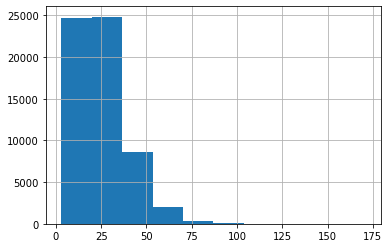

In [200]:
DATIS['NameLen'].hist()

In [201]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split
import pickle

In [202]:
import pandas as pd
import numpy as np
from numpy import random
from sklearn.metrics import accuracy_score, confusion_matrix
import matplotlib.pyplot as plt


In [203]:
DATIS.Label2=DATIS.Label2.str.lower()

In [204]:
DATIS['RoomType']=np.where((DATIS.Label2.str.contains('|'.join(['dining','laundry']))) | (DATIS.Label2=='junk'),'other',
                           np.where(DATIS.CleanName.str.contains('corridor'),'corridor vestibule',
                           DATIS['Label2']))

In [205]:
DATIS['Label2Count']=DATIS.assign(dummy=1).groupby('Label2')['dummy'].transform('sum')

In [206]:
DATIS=DATIS.query('Label2Count>=50').reset_index(drop=True)

In [207]:
#pd.set_option('display.max_rows', 400)
#DATIS.assign(dummy=1).drop_duplicates(['Label2','CleanName']).groupby(['Label2'])['dummy'].sum().reset_index().sort_values(by='dummy',ascending=False).query('dummy>=30')

In [208]:
binomiallist=[]
for i in range(0,len(DATIS)):
        binomiallist.append(np.random.binomial(1, .5))

In [209]:
DATIS['Keep']=binomiallist
DATIS['Keep']=np.where((DATIS['Label2']=='other'),DATIS['Keep'],1)

In [210]:
DATIS[(DATIS['Label2']=='other')]['Keep'].value_counts()

1    6419
0    6369
Name: Keep, dtype: int64

In [211]:
DATIS2=DATIS[DATIS['Keep']==1]

In [212]:
DATIS2['Dummy']=1

C:\Users\dmckenzie\Anaconda3\envs\Three Sev\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [213]:
len(DATIS2)

43623

In [214]:
DATIS2[['Name','Category','Total']].drop_duplicates()

,Name,Category,Total
0,ACOUSTIC PANBEWL,Generic Models,1
1,AUNV_NivoAcoustic_Unlit,Lighting Fixtures,72
2,Acoustic Baffle 3,Generic Models,3
3,MTPS Acoustic Baffle,Generic Models,108
4,Acoustic_Baffle_Non-Hosted_DLR,Generic Models,378
...,...,...,...
49987,Workstation_3738,Specialty Equipment,1
49988,"Workstation, Computer, Wall Mounted",Specialty Equipment,292
49989,Workstation-Teknion-Expansion_Desking_Open_05-...,Furniture Systems,2
49990,Workstation-Teknion-B_MDWO-Open_Frame_Legs-R2015,Furniture,20


In [215]:
print(len(DATIS2[['Name','Category','Total']].drop_duplicates()))
print(len(DATIS2[['Name','Total']].drop_duplicates()))

43623
43438


In [216]:

from tqdm import tqdm

rowlist=list()

rows=list(DATIS2.reset_index(drop=True).index.values)

for i in tqdm(rows):
    
    multiplier=int(np.where(DATIS2.iloc[[i]]['Total']>50,50,DATIS2.iloc[[i]]['Total']))
    
    rowlist.append(pd.concat([DATIS2.iloc[[i]]]*multiplier))
    

100%|██████████| 43623/43623 [05:18<00:00, 137.03it/s]


In [250]:
DATIS2['InputType'].value_counts()

other                                     93253
casework                                  13675
shower showers seat                       11535
int frame                                  7754
fixture lighting                           6081
chair lounge                               5813
table                                      5571
storage cabinet cabinets                   5259
chair                                      5258
mirror                                     5044
duplex receptacle                          4692
bench entry                                4500
desk desks office officer                  4474
furniture                                  4417
seating seat chair chairs                  4273
toilet standard                            4264
linear light lights lighting               4063
mod light                                  4037
panel                                      3952
trash waste                                3933
dispenser soap                          

In [240]:
DATIS2.reset_index(drop=True).index.values

array([     0,      1,      2, ..., 523171, 523172, 523173], dtype=int64)

In [217]:
DATIS2=pd.concat(rowlist,ignore_index=True)

In [218]:
DATIS2=DATIS2.rename(columns={'Label2':'InputType'})

In [219]:
size = 400        # sample size
replace = True  # with replacement
fn = lambda obj: obj.loc[np.random.choice(obj.index, size, replace),:]
DATIS3=DATIS2.groupby('InputType', as_index=False).apply(fn).reset_index(drop=True)

In [221]:
y = DATIS3.InputType.str.lower()

In [251]:
y2=DATIS2.InputType.str.lower()
xx2=DATIS2['Name']

In [223]:
DATIS3['Name'] = DATIS3['CleanName']
DATIS2['Name'] = DATIS2['CleanName']

In [224]:
X = DATIS3['Name']

In [225]:
#DATIS2['ID']=DATIS2.reset_index(drop=True).index.values

In [254]:
X_train, X_test, y_train, y_test = train_test_split(X, y,stratify=y ,test_size=0.2, random_state = 44)

In [255]:
len(y_train)

84480

In [228]:
from sklearn.model_selection import GridSearchCV
from sklearn.pipeline import Pipeline

In [229]:
#ToScore.to_csv('SpaceProgramClassed.csv')

In [230]:
from sklearn.linear_model import SGDClassifier
from sklearn.feature_extraction.text import TfidfVectorizer


tfidfvec=TfidfVectorizer(ngram_range=(1,1),max_df=.4,min_df=1,norm='l2',smooth_idf=True,sublinear_tf=False,use_idf=True)
mod=SGDClassifier(penalty='l1',loss='log')

#vectorizer.fit(X_train)
#X_train2=vectorizer.transform(X_train)
#X_test2=vectorizer.transform(X_test)




text_clf = Pipeline([ 
    ('tfidf', tfidfvec),
    ('clf', mod),
])


text_clf.fit(X_train, y_train)

#mod.fit(X_train2, y_train)

from sklearn.metrics import classification_report
#y_pred = mod.predict(X_test2)
y_pred2 = text_clf.predict(X_test)
print('accuracy %s' % accuracy_score(y_pred2, y_test))
#print(classification_report(y_test, y_pred2))


#print('accuracy %s' % accuracy_score(y_pred, y_test))
#print(classification_report(y_test, y_pred))

accuracy 0.6637310606060606


In [231]:
from sklearn.metrics import classification_report
#y_pred = mod.predict(X_test2)
y_pred2 = text_clf.predict(X_test)
print('accuracy %s' % accuracy_score(y_pred2, y_test))
#print(classification_report(y_test, y_pred2))


print('accuracy %s' % accuracy_score(y_pred2, y_test))
print(classification_report(y_test, y_pred2))
crp=classification_report(y_test, y_pred2,output_dict=True)

accuracy 0.6637310606060606
accuracy 0.6637310606060606


C:\Users\dmckenzie\Anaconda3\envs\Three Sev\lib\site-packages\sklearn\metrics\_classification.py:1308: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\dmckenzie\Anaconda3\envs\Three Sev\lib\site-packages\sklearn\metrics\_classification.py:1308: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\dmckenzie\Anaconda3\envs\Three Sev\lib\site-packages\sklearn\metrics\_classification.py:1308: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result)

                                        precision    recall  f1-score   support

       acoustic acoustics panel panels       1.00      0.42      0.60        80
                      adjustable shelf       0.87      0.84      0.85        80
                           alarm panel       1.00      0.66      0.80        80
               auditorium roof framing       0.87      0.69      0.77        80
                             aws elbow       1.00      0.21      0.35        80
                     bar bars shelving       0.82      0.68      0.74        80
                             bar stool       1.00      0.84      0.91        80
                          base cabinet       0.85      0.78      0.81        80
                     basin counter top       0.96      1.00      0.98        80
                 basin counter top lhs       0.76      0.89      0.82        80
                         bathroom type       0.75      0.86      0.80        80
                          batten lower 

C:\Users\dmckenzie\Anaconda3\envs\Three Sev\lib\site-packages\sklearn\metrics\_classification.py:1308: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\dmckenzie\Anaconda3\envs\Three Sev\lib\site-packages\sklearn\metrics\_classification.py:1308: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\dmckenzie\Anaconda3\envs\Three Sev\lib\site-packages\sklearn\metrics\_classification.py:1308: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result)

In [232]:
crpDF=pd.DataFrame(crp).transpose()

In [233]:
DATIS3[DATIS3['RoomType']=='table']

,Unnamed: 0,FinalLab,NameFilter,Category,Name,Total,Name2,Cluster,Label,ClustTotal,...,FinalFinalLab,InputType,CleanName,NameLen,RoomName,TokenCount,RoomType,Label2Count,Keep,Dummy
93600,41943,table medical,exam table,Furniture,table_exam,13,table exam,473,table medical,600,...,table,table,table_exam,10,table_exam,1,table,600,1,1
93601,42360,table medical,table,Furniture Systems,allsteel a8 table,614,allsteel a table,473,table medical,600,...,table,table,allsteel a8 table,21,allsteel - a8 - table,5,table,600,1,1
93602,41954,table medical,flip table,Furniture,21037 flip table,59,flip table,473,table medical,600,...,table,table,21037 flip table,16,21037 flip table,3,table,600,1,1
93603,41972,table medical,fusion table,Furniture,table_fusion_dlr,134,table fusion dlr,473,table medical,600,...,table,table,table_fusion_dlr,16,table_fusion_dlr,1,table,600,1,1
93604,41975,table medical,grab and square table,Furniture,grab and go_square table 3ft,47,grab and go square table ft,473,table medical,600,...,table,table,grab and go_square table 3ft,28,grab and go_square table 3ft,5,table,600,1,1
93605,42211,table medical,table,Furniture,fourhands marlow table,149,fourhands marlow table,473,table medical,600,...,table,table,fourhands marlow table,22,fourhands marlow table,3,table,600,1,1
93606,42187,table medical,table,Furniture,209 table,158,table,473,table medical,600,...,table,table,209 table,9,209 table,2,table,600,1,1
93607,41982,table medical,horseshoe table,Furniture,table_horseshoe_artcobell_dlr,105,table horseshoe artcobell dlr,473,table medical,600,...,table,table,table_horseshoe_artcobell_dlr,29,table_horseshoe_artcobell_dlr,1,table,600,1,1
93608,42199,table medical,table,Furniture,ali table,96,ali table,473,table medical,600,...,table,table,ali table,9,ali table,2,table,600,1,1
93609,41944,table medical,exam table,Furniture Systems,doctors_large_exam_table_2781,52,doctors large exam table,473,table medical,600,...,table,table,doctors_large_exam_table_2781,29,doctors_large_exam_table_2781,1,table,600,1,1


In [234]:
crpDF.query('precision<.68').sort_values('precision')

,precision,recall,f1-score,support
other,0.000000,0.000000,0.000000,80.000000
int frame,0.013922,0.950000,0.027442,80.000000
table,0.466667,0.350000,0.400000,80.000000
pulls round,0.472973,0.437500,0.454545,80.000000
sink sinks basin,0.491228,0.350000,0.408759,80.000000
toilet,0.493827,0.500000,0.496894,80.000000
tack wall,0.500000,0.987500,0.663866,80.000000
wall walls elec,0.536585,0.275000,0.363636,80.000000
panel,0.540230,0.587500,0.562874,80.000000
chair,0.568627,0.362500,0.442748,80.000000


0.9384615384615385


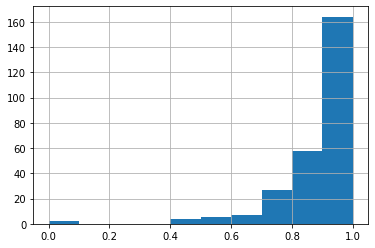

In [235]:
pd.DataFrame(crp).transpose()['precision'].hist()
print(pd.DataFrame(crp).transpose()['precision'].median())

0.7786259541984732


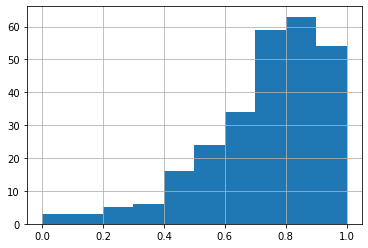

In [236]:
pd.DataFrame(crp).transpose()['f1-score'].hist()
print(pd.DataFrame(crp).transpose()['f1-score'].median())

In [237]:
from sklearn.naive_bayes import *
clf = BernoulliNB()
text_clf2 = Pipeline([ 
    ('tfidf', tfidfvec),
    ('clf', clf),
])


text_clf2.fit(X_train, y_train)

from sklearn.metrics import classification_report
#y_pred = mod.predict(X_test2)
y_pred22 = text_clf2.predict(X_test)
print('accuracy %s' % accuracy_score(y_pred22, y_test))
print(classification_report(y_test, y_pred22))


accuracy 0.8957386363636364
                                        precision    recall  f1-score   support

       acoustic acoustics panel panels       1.00      0.68      0.81        80
                      adjustable shelf       0.95      0.86      0.90        80
                           alarm panel       0.97      0.93      0.95        80
               auditorium roof framing       0.96      0.82      0.89        80
                             aws elbow       0.97      0.79      0.87        80
                     bar bars shelving       0.98      0.80      0.88        80
                             bar stool       0.97      0.95      0.96        80
                          base cabinet       0.99      0.97      0.98        80
                     basin counter top       1.00      1.00      1.00        80
                 basin counter top lhs       0.90      0.96      0.93        80
                         bathroom type       0.97      0.96      0.97        80
           

In [238]:
crp2=classification_report(y_test, y_pred22,output_dict=True)

Median Score: 0.9841269841269841


Room Inputs Predicted With Less Than 80% Precision

                   precision  recall  f1-score  support
cpt                0.046976  1.0000  0.089736     80.0
door doors entry   0.789474  0.9375  0.857143     80.0
walking            0.782178  0.9875  0.872928     80.0


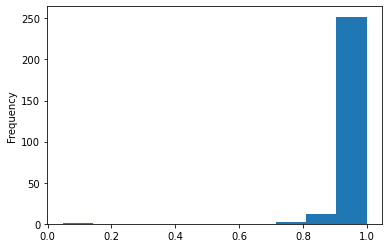

In [239]:
print('Median Score:',pd.DataFrame(crp2).transpose()['precision'].median())
pd.DataFrame(crp2).transpose()['precision'].plot(kind='hist')

print('\n\nRoom Inputs Predicted With Less Than 80% Precision\n\n',pd.DataFrame(crp2).transpose().query('precision<.8'))

In [111]:
DATIS3['RoomType'].value_counts()

other                                                   1600
corridor vestibule                                       865
acoustic acoustics panel panels                          400
nightstand                                               400
music storage system                                     400
mount mounted wall                                       400
mop sink                                                 400
models                                                   400
mod toilets toilet                                       400
mod minister                                             400
mod light                                                400
mirror mirrors mirrored toilet                           400
mirror                                                   400
midi software control                                    400
office private                                           400
microwave                                                400
meridian series         

In [102]:
X_test

52437                      dlrz_table_folding_school_dining
115458                                           ev parking
67931                               equipment location bcer
86369     steelcase turnstone  bivi  height adjustable d...
118055                                           rpc female
                                ...                        
17343                          duress button  unhosted bcer
92135                                            kitchen l1
94125                               etc propoint washer_dlr
132211                                 x288  peg wall shelf
70841                                 dlr_ext_hmframe_fixed
Name: Name, Length: 40200, dtype: object

In [55]:
from skl2onnx import convert_sklearn
from skl2onnx.common.data_types import StringTensorType
from onnxmltools import save_model
from onnxruntime import InferenceSession

In [56]:
onnx_model = convert_sklearn(text_clf,
name='JCRoomTypeClassifier',
initial_types=[('input', StringTensorType([1, 1]))]
)

save_model(onnx_model, 'JC.onnx')
sess = InferenceSession("JC.onnx")
label_name = sess.get_outputs()[0].name
input_name = sess.get_inputs()[0].name

#res = sess.run(None, input_feed={'input': np.array([['corridor']])})

C:\Users\dmckenzie\Anaconda3\envs\Three Seven\lib\site-packages\skl2onnx\operator_converters\text_vectoriser.py:185: UserWarning: Converter for TfidfVectorizer will use scikit-learn regular expression by default in version 1.6.
  UserWarning)
C:\Users\dmckenzie\Anaconda3\envs\Three Seven\lib\site-packages\skl2onnx\common\_container.py:595: UserWarning: Unable to find operator 'Tokenizer' in domain 'com.microsoft' in ONNX, op_version is forced to 1.
  op_type, domain))


In [90]:
DATIS[DATIS['RoomName'].str.contains('court')]['RoomName'].value_counts()

std jury courtroom                                    229
std courtroom                                          70
juvenile courtroom                                     43
courtroom                                              22
court reporter                                         19
large trial courtroom                                  14
court room                                             13
court admin office                                      7
future courtroom                                        6
courtroom deputy b                                      6
courtyard                                               6
courts                                                  6
jury courtroom                                          6
courtroom deputy c                                      6
standard trial courtroom                                6
court                                                   6
courtroom deputy a                                      6
excerise court

In [84]:
sess.run(None, input_feed={'input': np.array([["Outdoor Exercise Court"]])})


[array(['court'], dtype=object),
 [{'bailiff': 0.0002894130884669721,
   'balcony': 0.00021149592066649348,
   'booking law': 0.00034584300010465086,
   'break room': 9.63763304753229e-05,
   'cart carts handling': 0.00030858570244163275,
   'chase': 0.0001596335059730336,
   'circulation': 0.0002786496770568192,
   'classroom': 1.543940743431449e-05,
   'closet jan': 0.0003261362435296178,
   'coffee cafe': 0.0003527702356223017,
   'communication communications telecom': 7.246812310768291e-05,
   'conference': 0.00024678430054336786,
   'control': 0.00025943160289898515,
   'cooler freezer freezers': 0.00026399255148135126,
   'corridor hallway': 0.00017339945770800114,
   'corridor vestibule': 0.00033005038858391345,
   'court': 0.4361991286277771,
   'courtyard outdoor': 0.00035659389686770737,
   'day room': 4.669848203775473e-05,
   'dental dentist': 0.00025839131558313966,
   'detox': 0.0003010625368915498,
   'dialysis': 0.0003901280288118869,
   'dinning': 0.000339760998031124

In [43]:
with open("TextClassifier1.onnx", "wb") as f:
    f.write(onnx_model.SerializeToString())

In [42]:
res

[array(['services1'], dtype=object),
 [{'amenity': 0.07348394393920898,
   'circulation': 0.044751111418008804,
   'collaboration: closed': 0.07773763686418533,
   'collaboration: open': 0.04349435120820999,
   'desking: open workstation': 0.031024377793073654,
   'desking: private office': 0.049801651388406754,
   'lab': 0.04049787297844887,
   'services 2': 0.039142508059740067,
   'services1': 0.4987942576408386,
   'support': 0.10127229988574982}]]

In [79]:
matchdf=pd.DataFrame({'A':list(y_pred2[X_test.isin(list(X_train))==False]),
              'B':list(y_test[X_test.isin(list(X_train))==False])})

In [80]:
matchdf['C']=(matchdf['A']==matchdf['B'])*1

In [81]:
matchdf['D']=1

In [82]:
labels=list(matchdf.groupby(['A'])['D'].sum().index)

In [83]:
scores=list(matchdf.groupby(['A'])['C'].sum().values/matchdf.groupby(['A'])['D'].sum().values)

In [84]:
print('Accuracy:',matchdf['C'].sum()/matchdf['D'].sum())

Accuracy: 0.8950617283950617


In [85]:
pd.DataFrame({'Category':labels,'Guesses':list(matchdf.groupby(['A'])['D'].sum().values),'True Positive Rate':scores})

,Category,Guesses,True Positive Rate
0,art digital exist,10,0.600000
1,bathroom,32,0.843750
2,classroom,83,0.879518
3,collaboration student work,4,1.000000
4,common social collaboration,11,0.636364
5,conference resource collaboration,6,0.833333
6,corridor mail central,3,0.666667
7,lab exist flex,23,0.782609
8,locker athletic official,13,1.000000
9,mechanical yard auditorium,5,0.800000


C:\Users\dmckenzie\Anaconda3\envs\Three Seven\lib\site-packages\sklearn\model_selection\_validation.py:552: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\dmckenzie\Anaconda3\envs\Three Seven\lib\site-packages\sklearn\model_selection\_validation.py", line 531, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\dmckenzie\Anaconda3\envs\Three Seven\lib\site-packages\sklearn\linear_model\_stochastic_gradient.py", line 728, in fit
    sample_weight=sample_weight)
  File "C:\Users\dmckenzie\Anaconda3\envs\Three Seven\lib\site-packages\sklearn\linear_model\_stochastic_gradient.py", line 541, in _fit
    accept_large_sparse=False)
  File "C:\Users\dmckenzie\Anaconda3\envs\Three Seven\lib\site-packages\sklearn\base.py", line 432, in _validate_data
    X, y = check_X_y(X, y, **check_params)
  File "C:\Users\dmckenzie\Anaconda3\e

C:\Users\dmckenzie\Anaconda3\envs\Three Seven\lib\site-packages\sklearn\model_selection\_validation.py:552: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\dmckenzie\Anaconda3\envs\Three Seven\lib\site-packages\sklearn\model_selection\_validation.py", line 531, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\dmckenzie\Anaconda3\envs\Three Seven\lib\site-packages\sklearn\linear_model\_stochastic_gradient.py", line 728, in fit
    sample_weight=sample_weight)
  File "C:\Users\dmckenzie\Anaconda3\envs\Three Seven\lib\site-packages\sklearn\linear_model\_stochastic_gradient.py", line 541, in _fit
    accept_large_sparse=False)
  File "C:\Users\dmckenzie\Anaconda3\envs\Three Seven\lib\site-packages\sklearn\base.py", line 432, in _validate_data
    X, y = check_X_y(X, y, **check_params)
  File "C:\Users\dmckenzie\Anaconda3\e

<AxesSubplot:title={'center':'Classifier Validation Score As Training Data Grows'}, xlabel='Training Data Size', ylabel='Validation Score'>

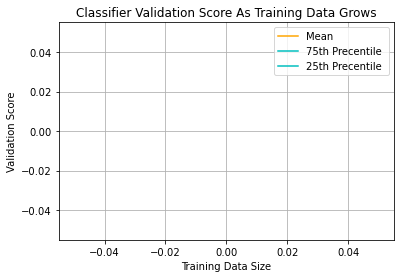

In [39]:
import numpy as np
from sklearn.model_selection import learning_curve
from sklearn.datasets import load_iris
from sklearn.linear_model import Ridge

#np.random.seed(0)
#X, y = load_iris(return_X_y=True)
#indices = np.arange(y.shape[0])
#np.random.shuffle(indices)
#X, y = X[indices], y[indices]

train_sizes, train_scores, valid_scores = learning_curve(SGDClassifier(penalty='l1',loss='log',alpha=0.00001),
                                                         X_train, y_train, train_sizes=[10,20,30,40,50,60,70,80,90,100,
                                                                                         110,120,130,140,150,160,170,180,190,200,
                                                                                         210,220,230,240,250,260,270,280,290,300,
                                                                                         310,320,330,340,350,360,370,380,390,400,
                                                                                        410,420,430],cv=5)
pd.DataFrame({'Mean':list(pd.DataFrame(valid_scores.transpose()).median()),
             '75th Precentile ':list(pd.DataFrame(valid_scores.transpose()).quantile(0.75)),
             '25th Precentile':list(pd.DataFrame(valid_scores.transpose()).quantile(0.25))},
             index=train_sizes).plot(color = ['orange', 'c','c'],
                                    xlabel='Training Data Size',ylabel='Validation Score',
                                     grid=True,title='Classifier Validation Score As Training Data Grows')

In [37]:
pd.DataFrame(valid_scores.transpose()).mean().plot()

NameError: name 'valid_scores' is not defined

In [38]:
pd.DataFrame(pd.DataFrame(valid_scores.transpose())).plot()

NameError: name 'valid_scores' is not defined